### Importing libraries

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import missingno as msno

### Read the dataset into a DataFrame variable.

In [253]:
netflix_df=pd.read_csv('Data/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### first remove the unwanted description column

In [254]:
netflix_df.drop('description',axis=1,inplace=True)

### Looking at the dataframe informtion 

In [255]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


#### It seems we have some columns with null values

In [256]:
print('The columns with the number of null_value are:\n' +str({k:v for (k,v) in netflix_df.isna().sum().to_dict().items() if v!=0}))

The columns with the number of null_value are:
{'director': 2634, 'cast': 825, 'country': 831, 'date_added': 10, 'rating': 4, 'duration': 3}


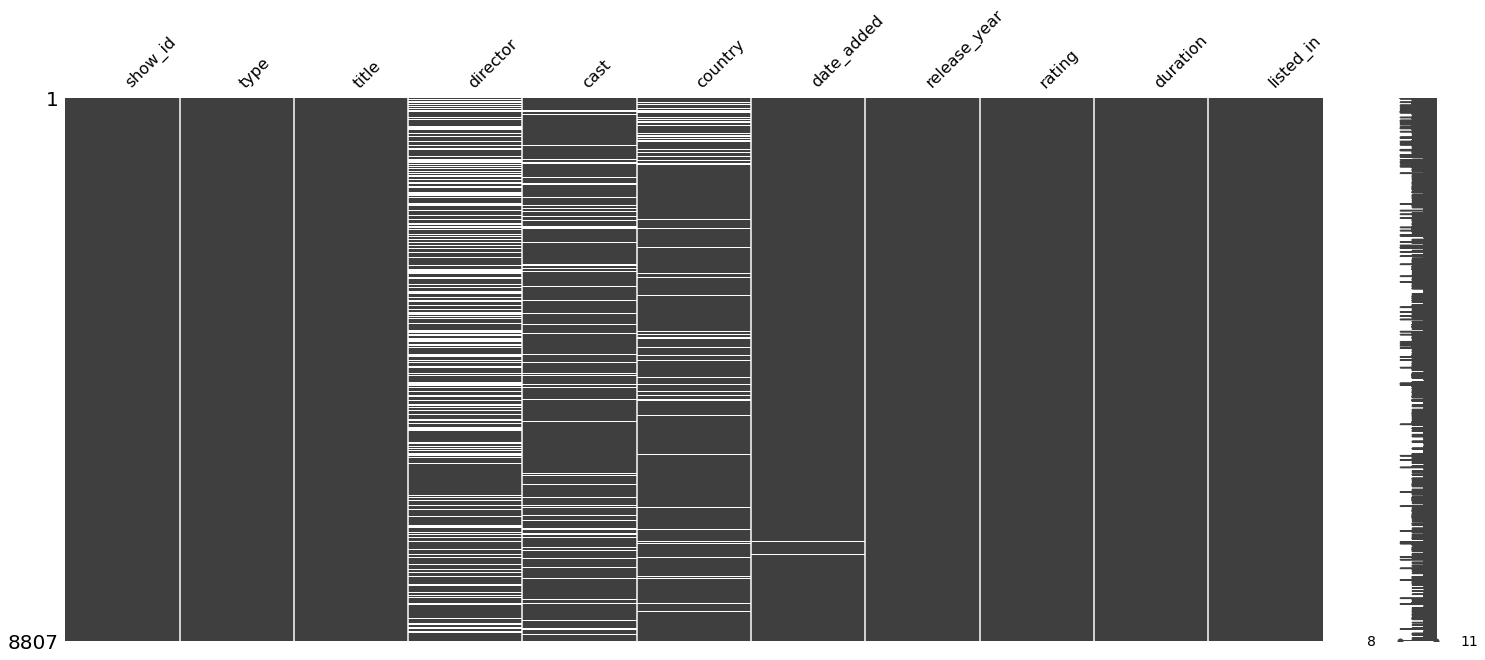

In [257]:
msno.matrix(netflix_df)

### Dealing with missing value by droping

In [261]:
netflix_df.dropna(subset=['rating','duration','date_added'],inplace=True)
netflix_df.dropna(thresh=8,inplace=True)

In [262]:
print('Now The columns with the number of null_value are:\n' +str({k:v for (k,v) in netflix_df.isna().sum().to_dict().items() if v!=0}))

Now The columns with the number of null_value are:
{'director': 2621, 'cast': 825, 'country': 829}


### The show_ids with at least 2 null columns

In [263]:
netflix_df[(netflix_df['director'].isna())&(netflix_df['cast'].isna())]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV"
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,22-Sep-21,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries"
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,NaN,India,15-Sep-21,2014,TV-G,1 Season,"Docuseries, International TV Shows"
69,s70,TV Show,Stories by Rabindranath Tagore,NaN,NaN,India,15-Sep-21,2015,TV-PG,1 Season,"International TV Shows, TV Dramas"
...,...,...,...,...,...,...,...,...,...,...,...
8605,s8606,TV Show,Top Grier,NaN,NaN,United States,31-Dec-18,2018,TV-MA,3 Seasons,Reality TV
8609,s8610,TV Show,Towies,NaN,NaN,NaN,27-Dec-17,2016,TV-MA,1 Season,"International TV Shows, Reality TV"
8700,s8701,TV Show,Wartime Portraits,NaN,NaN,Poland,15-Sep-16,2014,TV-MA,1 Season,"Docuseries, International TV Shows"
8755,s8756,TV Show,Women Behind Bars,NaN,NaN,United States,"November 1, 2016",2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries"


### Dealing with missing value by imputating

In [264]:
netflix_df.fillna({'director':'Unknown',
                    'cast'  :'Unknown',
                    'country' :'not_mention' }, inplace=True)

Now The columns with the number of null_value are:
{}


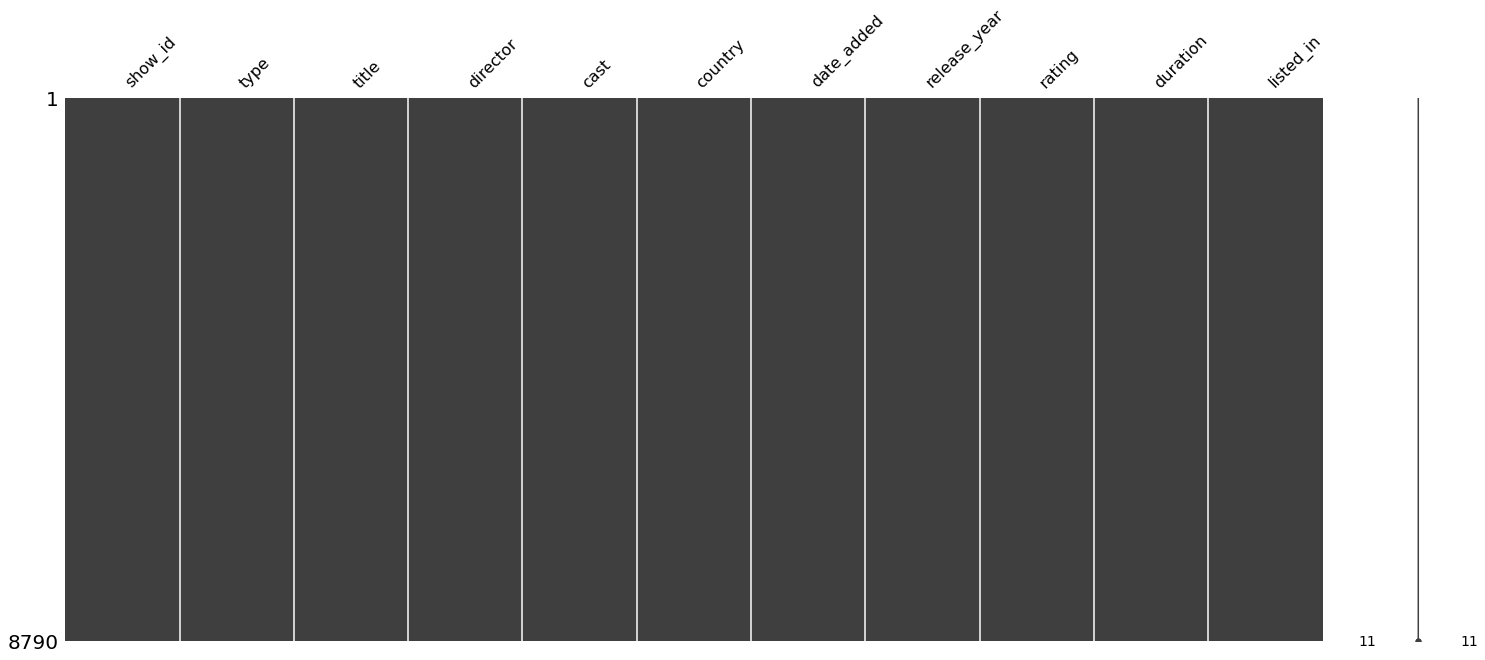

In [265]:
print('Now The columns with the number of null_value are:\n' +str({k:v for (k,v) in netflix_df.isna().sum().to_dict().items() if v!=0}))
msno.matrix(netflix_df)

In [266]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,25-Sep-21,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",not_mention,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,not_mention,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


### Setting the index of dataframe to Show_id column

#### first make sure there is not any duplicated values in show_id column

In [267]:
netflix_df.duplicated().sum()

0

In [268]:
netflix_df.set_index('show_id',inplace=True)


#### Checking if there is not any duplicated values after setting index


In [269]:
netflix_df.loc[netflix_df.duplicated(keep=False)]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,,
s3963,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,29-Mar-19,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"
s3997,TV Show,9-Feb,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",not_mention,20-Mar-19,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
s4523,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",10-Oct-18,2018,R,144 min,"Dramas, Thrillers"
s5965,TV Show,9-Feb,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",not_mention,20-Mar-19,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
s5966,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",10-Oct-18,2018,R,144 min,"Dramas, Thrillers"
s5967,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,29-Mar-19,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


### Dealing with the duplicated values by deleting the second one

In [270]:
netflix_df.drop_duplicates(keep='last', inplace=True)

### Dealing with same meaning values in rating column

In [271]:
netflix_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

 If a film has not been submitted for a rating or is an uncut version of a film that was submitted, the labels Not Rated (NR) or Unrated (UR) are often used. So we can change all UR to NR.

In [272]:

netflix_df.loc[netflix_df['rating']=='UR','rating']='NR'

### Dealing with date column as object

In [282]:
netflix_df['date_added']=pd.to_datetime(netflix_df['date_added'])
netflix_df['year_added']=netflix_df['date_added'].dt.year
netflix_df['month_added']=netflix_df['date_added'].dt.month_name()
netflix_df['year-month_added']=netflix_df['year_added'].astype('str')+'-'+netflix_df['month_added']

In [286]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8787 entries, s1 to s8807
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   type              8787 non-null   object        
 1   title             8787 non-null   object        
 2   director          8787 non-null   object        
 3   cast              8787 non-null   object        
 4   country           8787 non-null   object        
 5   date_added        8787 non-null   datetime64[ns]
 6   release_year      8787 non-null   int64         
 7   rating            8787 non-null   object        
 8   duration          8787 non-null   object        
 9   listed_in         8787 non-null   object        
 10  year_added        8787 non-null   int64         
 11  month_added       8787 non-null   object        
 12  year-month_added  8787 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 961.1+ KB


In [288]:
netflix_df['title'].nunique()

8787